# 1. Data Understanding

## 1.1 Import Data

In [1]:
import pandas as pd
import re
import unicodedata
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# -------------------------------
# STEP 1: Load Dataset
# -------------------------------
df = pd.read_csv("../dataset/dataset.csv")

In [2]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


## 1.2 Distribusi Sentimen

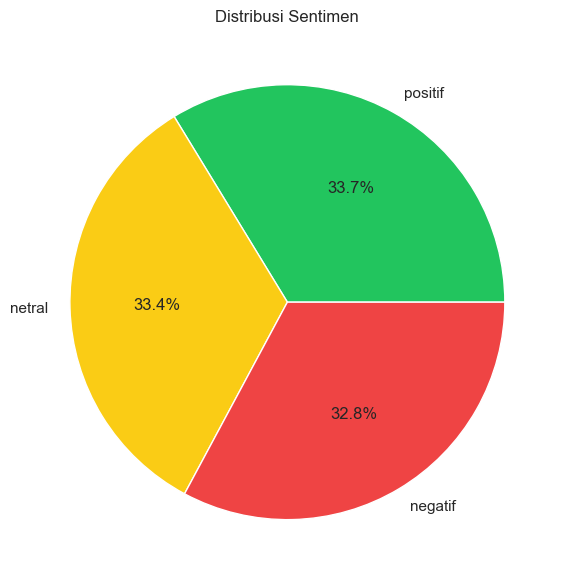

In [3]:
# -------------------------------
# STEP 2: Distribusi Sentimen
# -------------------------------
sns.set_theme(style="whitegrid")
sentiment_counts = df['sentimen'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        colors=['#22c55e', '#facc15', '#ef4444'])  # Hijau, Kuning, Merah
plt.title("Distribusi Sentimen")
plt.tight_layout()
plt.show()

## 1.3 Unicode Normalization

In [4]:
# -------------------------------
# STEP 3: Unicode Normalization
# -------------------------------
def normalize_unicode(text):
    return unicodedata.normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore")

df["normalized_tweet"] = df["tweet"].apply(normalize_unicode)
df.head()

,Unnamed: 0,sentimen,tweet,normalized_tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...


## 1.4 Cleaning Tweet

In [5]:
# -------------------------------
# STEP 4: Cleaning Tweet
# -------------------------------
def clean_for_tokens(text):
    text = text.lower()
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
    text = re.sub(r"@\\w+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    text = re.sub(r"\\s+", " ", text).strip()
    return text

df["cleaned_tweet"] = df["normalized_tweet"].apply(clean_for_tokens)
df.head()

,Unnamed: 0,sentimen,tweet,normalized_tweet,cleaned_tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


## 1.5 Tweet Length Features

In [6]:
# -------------------------------
# STEP 5: Tweet Length Features
# -------------------------------
df["char_len"] = df["cleaned_tweet"].apply(len)
df["word_len"] = df["cleaned_tweet"].apply(lambda x: len(x.split()))
df.head()

,Unnamed: 0,sentimen,tweet,normalized_tweet,cleaned_tweet,char_len,word_len
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,153,19
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,84,11
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,115,11
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...,120,16
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,240,34


## 1.6 WordCloud per Sentiment

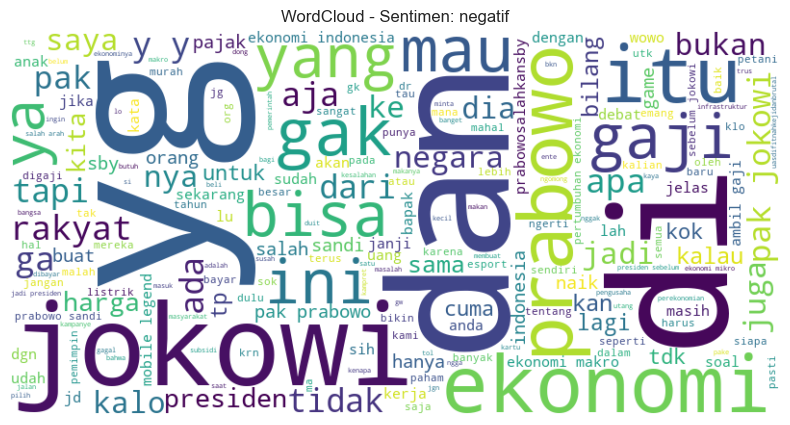

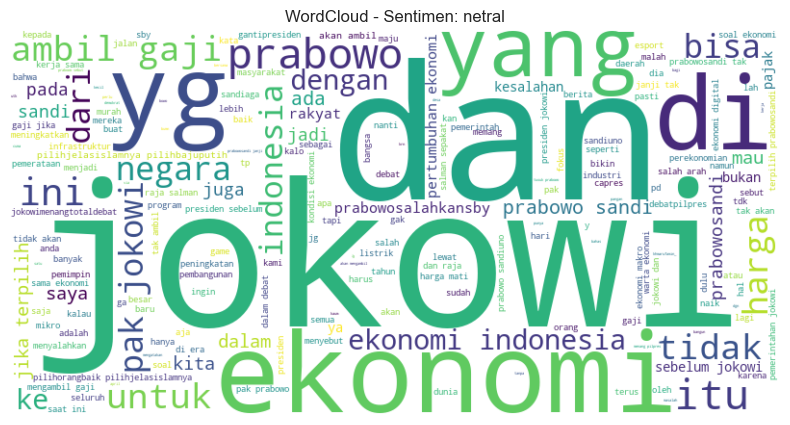

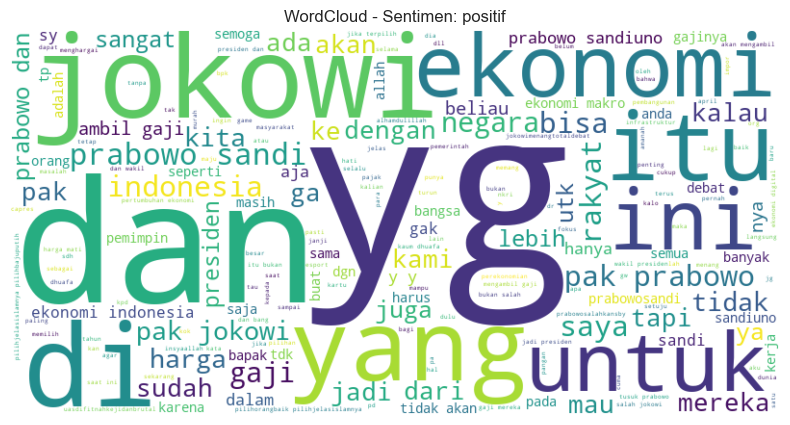

In [7]:
# -------------------------------
# STEP 6: WordCloud per Sentiment
# -------------------------------
for label in df["sentimen"].unique():
    text = " ".join(df[df["sentimen"] == label]["cleaned_tweet"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - Sentimen: {label}")
    plt.show()

## 1.7 Plot Tweet Length Stats

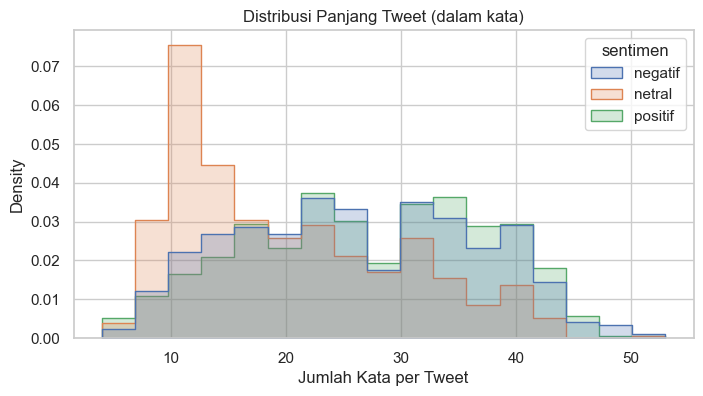

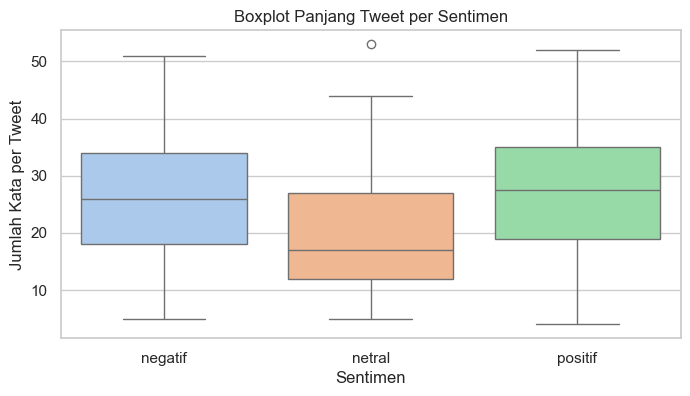

In [8]:
# -------------------------------
# STEP 7: Plot Tweet Length Stats
# -------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="word_len", hue="sentimen", element="step", stat="density", common_norm=False)
plt.title("Distribusi Panjang Tweet (dalam kata)")
plt.xlabel("Jumlah Kata per Tweet")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="sentimen", y="word_len", hue="sentimen", palette="pastel", legend=False)
plt.title("Boxplot Panjang Tweet per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Kata per Tweet")
plt.show()

## 1.8 Top 10 Words per Sentiment

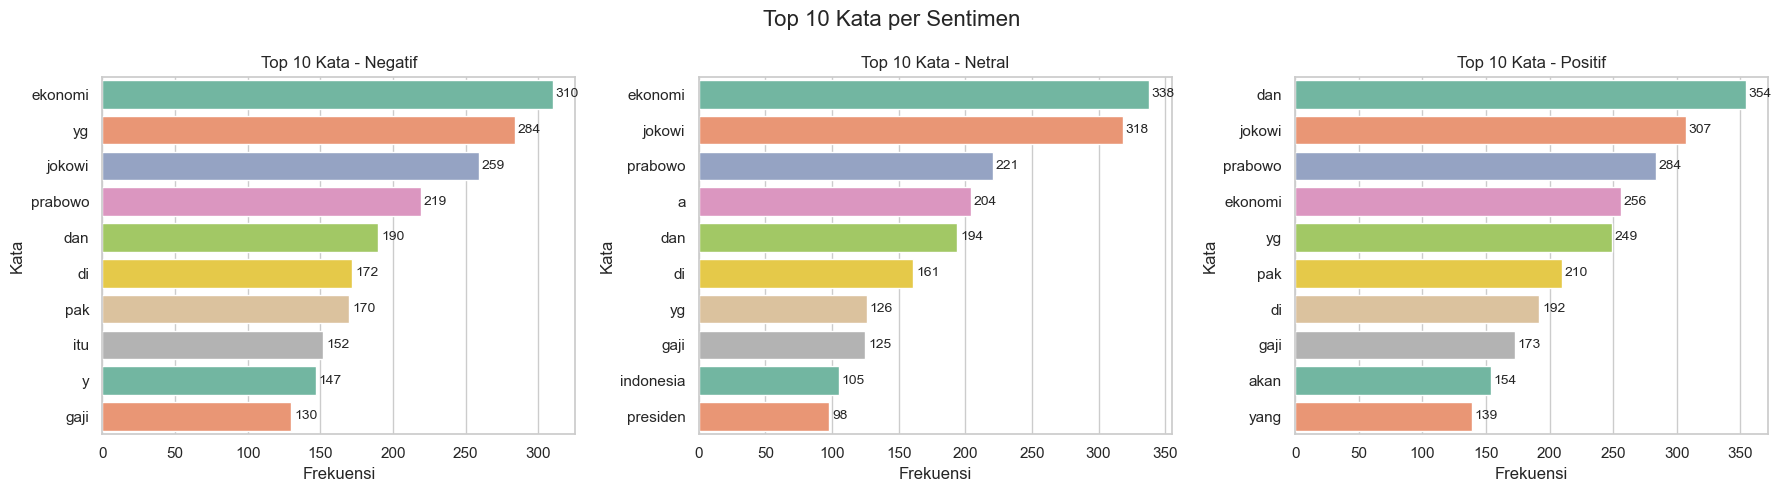

In [9]:
# -------------------------------
# STEP 8: Top 10 Words per Sentiment
# -------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
sentiments = df["sentimen"].unique()

for i, label in enumerate(sentiments):
    text = " ".join(df[df["sentimen"] == label]["cleaned_tweet"])
    tokens = text.split()
    counter = Counter(tokens).most_common(10)

    top_df = pd.DataFrame(counter, columns=["word", "count"]).sort_values(by="count", ascending=False)

    sns.barplot(data=top_df, x="count", y="word", hue="word", ax=axes[i], dodge=False, palette="Set2", legend=False)

    for idx, row in top_df.iterrows():
        axes[i].text(row["count"] + 2, idx, str(row["count"]), va='center', fontsize=10)

    axes[i].set_title(f"Top 10 Kata - {label.capitalize()}")
    axes[i].set_xlabel("Frekuensi")
    axes[i].set_ylabel("Kata")

plt.suptitle("Top 10 Kata per Sentimen", fontsize=16)
plt.tight_layout()
plt.show()
